In [1]:
import tifffile
import os
import numpy as np
import matplotlib.pyplot as plt
from mip.ome import generate_ome_from_qptiff
from mip.utils import extract_ome_tiff, get_ome_tiff_channels, make_pseudo

In [2]:
ome_fp = '/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/pkd/20230120_PKD_K1301459_K200452_2PB_K2200446_4PB/level_2/K1301459_K200452_2PB_K2200446_4PB.ome.tiff'
qptiff_fp = '/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/pkd/20230120_PKD_K1301459_K200452_2PB_K2200446_4PB/level_2/K1301459; K200452_2PB; K2200446_4PB_Scan1.qptiff'


In [3]:
get_ome_tiff_channels(ome_fp)

['DAPI',
 'E-cadherin',
 'CD138',
 'Collagen 4',
 'Podoplanin',
 'SMA',
 'CALB1 (D)',
 'b-Catenin1',
 'Pan-Cytokeratin',
 'AQP2 (D)',
 'CD20 (D)',
 'Vimentin',
 'LRP2 (D)',
 'CD8',
 'UMOD (D)',
 'CD4',
 'Ki67',
 'CP (D)',
 'CK19',
 'AQP1 (D)',
 'FoxP3',
 'P21 (D)',
 'CD31',
 'P16 (D)',
 'GDF15 (D)',
 'PAI1 (D)',
 'CXCL14 (D)',
 'SYNE2 (D)',
 'UCHL1 (D)']

In [4]:
cmap = {
    'DAPI': (0., 0., 1.),
    'Pan-Cytokeratin': (1., 0., 0.),
    'CD8': (0., 1., 0.),
    'Vimentin': (1., 1., 1.)
}
c2i = extract_ome_tiff(ome_fp, channels=sorted(cmap.keys()))
# pseudo = make_pseudo(c2i, cmap, contrast_pct=95.)

In [5]:
img = c2i['Vimentin'].copy()


In [6]:
np.random.permutation(img)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 2],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

/diskmnt/Projects/Users/estorrs/miniconda3/envs/squidpy/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

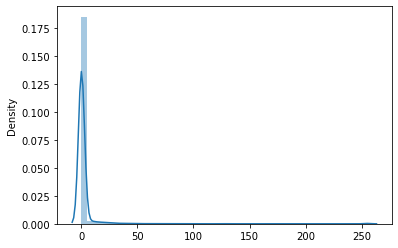

In [9]:
import seaborn as sns
sns.distplot(np.random.permutation(img).flatten()[:10000])

In [11]:
img[img>10] = 10
img = img.astype(np.float32)
img -= img.min()
img /= img.max()

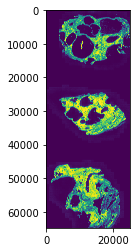

In [12]:
plt.imshow(img)

In [15]:
prefix = '/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/pkd/20230120_PKD_K1301459_K200452_2PB_K2200446_4PB/level_2'
generate_ome_from_qptiff(qptiff_fp, os.path.join(prefix, '20230120_PKD_K1301459.ome.tiff'),
                        bbox=(0, 20000, 0, img.shape[1]))
generate_ome_from_qptiff(qptiff_fp, os.path.join(prefix, '20230120_PKD_K200452_2PB.ome.tiff'),
                        bbox=(20000, 40000, 0, img.shape[1]))
generate_ome_from_qptiff(qptiff_fp, os.path.join(prefix, '20230120_PKD_K2200446_4PB.ome.tiff'),
                        bbox=(40000, img.shape[0], 0, img.shape[1]))


done
